# Exploratory Data Analysis

### Notebook Summary
This notebook explores how different attributes influence *salesEstimateCurrentPrice*. The analysis will help identify key patterns that can be used in the modeling stage.


## Notebook Setup

In [3]:
# Imports
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Data Loading & Understanding

In [4]:
# Creating data frame
clean_house_df = pd.read_csv(r'C:\Users\sanja\capstone-SanjayRaju2000\src\data\london_house_price_data_clean.csv')
clean_house_df.head()

,fullAddress,postcode,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,...,saleEstimate_lowerPrice,saleEstimate_currentPrice,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price
0,"Flat 35, Octavia House, Medway Street, London,...",SW1P 2TA,SW1P,51.495505,-0.132379,2.0,2.0,71.0,1.0,Leasehold,...,683000.0,759000.0,834000.0,MEDIUM,2025-01-10T11:04:57.114Z,49000.0,6.901408,2019-09-04,1995-01-03,249950
1,"24 Chester Court, Lomond Grove, London, SE5 7HS",SE5 7HS,SE5,51.478185,-0.092201,1.0,1.0,64.0,1.0,Leasehold,...,368000.0,388000.0,407000.0,HIGH,2024-10-07T13:26:59.894Z,28000.0,7.777778,2024-01-25,1995-01-03,32000
2,"18 Alexandra Gardens, London, N10 3RL",N10 3RL,N10,51.588774,-0.139599,1.0,4.0,137.0,2.0,Freehold,...,1198000.0,1261000.0,1324000.0,HIGH,2024-10-07T13:26:59.894Z,81000.0,6.864407,2022-12-14,1995-01-03,133000
3,"17 Collins Street, London, SE3 0UG",SE3 0UG,SE3,51.466089,0.006967,1.0,2.0,97.0,1.0,Freehold,...,897000.0,944000.0,991000.0,HIGH,2024-10-07T13:26:59.894Z,119000.0,14.424242,2021-09-30,1995-01-03,128500
4,"14 Theodore Road, London, SE13 6HT",SE13 6HT,SE13,51.451327,-0.007569,1.0,3.0,135.0,2.0,Freehold,...,690000.0,726000.0,762000.0,HIGH,2024-10-07T13:26:59.894Z,71000.0,10.839695,2021-12-06,1995-01-03,75000


In [5]:
# Columns and data types
clean_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265911 entries, 0 to 265910
Data columns (total 25 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   fullAddress                                265911 non-null  object 
 1   postcode                                   265911 non-null  object 
 2   outcode                                    265911 non-null  object 
 3   latitude                                   265911 non-null  float64
 4   longitude                                  265911 non-null  float64
 5   bathrooms                                  265911 non-null  float64
 6   bedrooms                                   265911 non-null  float64
 7   floorAreaSqM                               265911 non-null  float64
 8   livingRooms                                265911 non-null  float64
 9   tenure                                     265911 non-null  object 
 10  property

### Descriptive Statistics on Target

In [6]:
# Viewing descriptive statistics about target variable 
print(f"Min value = {clean_house_df['saleEstimate_currentPrice'].min()}")
print(f"Max value = {clean_house_df['saleEstimate_currentPrice'].max()}")
print(f"Mean = {clean_house_df['saleEstimate_currentPrice'].mean()}")
print(f"Median = {clean_house_df['saleEstimate_currentPrice'].median()}")
print(f"Standard deviation = {clean_house_df['saleEstimate_currentPrice'].std()}")

Min value = 89000.0
Max value = 17844000.0
Mean = 867979.865443701
Median = 619000.0
Standard deviation = 804371.6298535006


- Housing prices in London show a wide range:
  - Minimum price: £89,000
  - Maximum price: £17,844,000
  - Indicates both affordable and extremely high-end properties.

- Mean and median comparison:
  - Mean price: £867,980
  - Median price: £619,000
  - The mean is much higher than the median, suggesting a right-skewed distribution possibly driven by a few very expensive properties.

- Standard deviation:
  - Standard deviation: £804,372
  - Reflects a large spread in property prices, indicating high variability across the market.



## Univariate plot

### Distribution of Sales Estimate Current Price

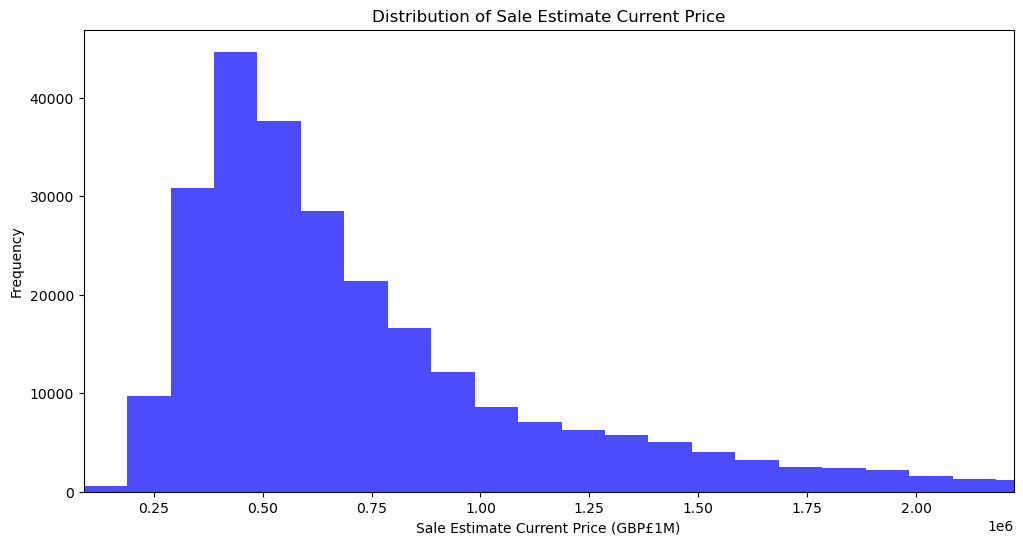

In [7]:

# Plotting the histogram for the 'saleEstimate_currentPrice' column
plt.figure(figsize=(12, 6))
plt.hist(clean_house_df['saleEstimate_currentPrice'], bins=178, color='blue', alpha=0.7)
plt.title('Distribution of Sale Estimate Current Price')
plt.xlabel('Sale Estimate Current Price (GBP£1M)')
plt.ylabel('Frequency')

# Set x-axis limits - Adjusting to 0.95 to narrow focus
plt.xlim([clean_house_df['saleEstimate_currentPrice'].min(), clean_house_df['saleEstimate_currentPrice'].quantile(0.95)]) 

# Save the figure
# plt.savefig('Sale_Estimate_Current_Price_Distribution.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


- Key insight and takeaway:
  - Most properties are concentrated at moderate price points.
  - A smaller fraction of high-cost, luxury properties skews the market.
  - The market is rich in mid-range properties but influenced by premium listings.

- Distribution type/shape:
  - The histogram shows a long right-tailed distribution.
  - Most property prices are clustered toward the lower (more affordable) end.
  - High-value properties, though fewer in number, pull the average price upward and impact the overall pricing landscape.

## Bivariate Plots

### Bathrooms against Average Sales Estimate Current Price

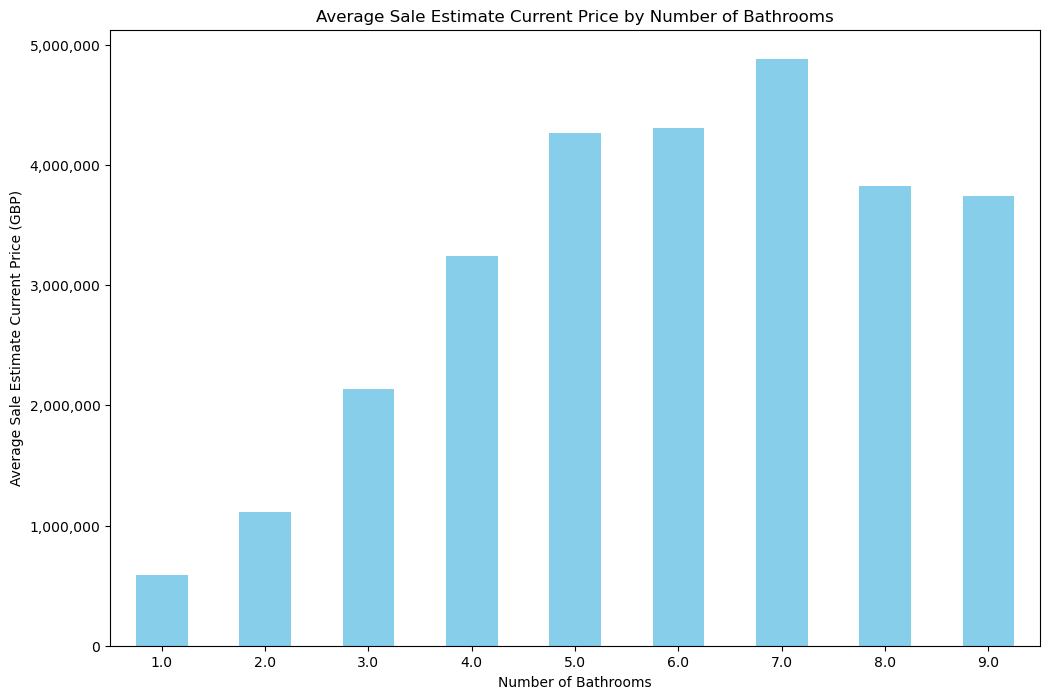

In [8]:
# Calculating mean saleEstimate_currentPrice for each number of bathrooms
bathroom_prices = clean_house_df.groupby('bathrooms')['saleEstimate_currentPrice'].mean()

# Plotting bar chart
plt.figure(figsize=(12, 8)) 
bathroom_prices.plot(kind='bar', color='skyblue')  
plt.title('Average Sale Estimate Current Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Sale Estimate Current Price (GBP)')
plt.xticks(rotation=0)

# Formatting the y-axis to show labels as currency 
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))  # Adds commas to the y-axis labels

# Save the figure
#plt.savefig('Sale_Estimate_Current_Price_by Number_of_Bathrooms.png', dpi=300, bbox_inches='tight')

plt.show()


- Key insight and takeaway:
  - The number of bathrooms is positively correlated with property price up to 7 bathrooms.
  - Properties with 7 bathrooms have the highest average prices.
  - After 7 bathrooms, there is a small drop, but prices remain relatively stable for 8 and 9 bathrooms.
  - Overall steady increase with minor diminishing returns at the very high end.
  - Optimal point at 7 bathrooms after which additional bathrooms may not add further value.

- Trend type/shape:
  - The trend is mostly linear and positive, with a slight flattening after 7 bathrooms.
  - No sharp decline is observed, and the general upward pattern is maintained.

- Considerations for modeling:
  - Number of bathrooms can be treated as a strong linear predictor of price.
  - A linear model should perform well, though minor non-linear adjustments could slightly improve accuracy if needed.


### Bedrooms against Average Sales Estimate Current Price

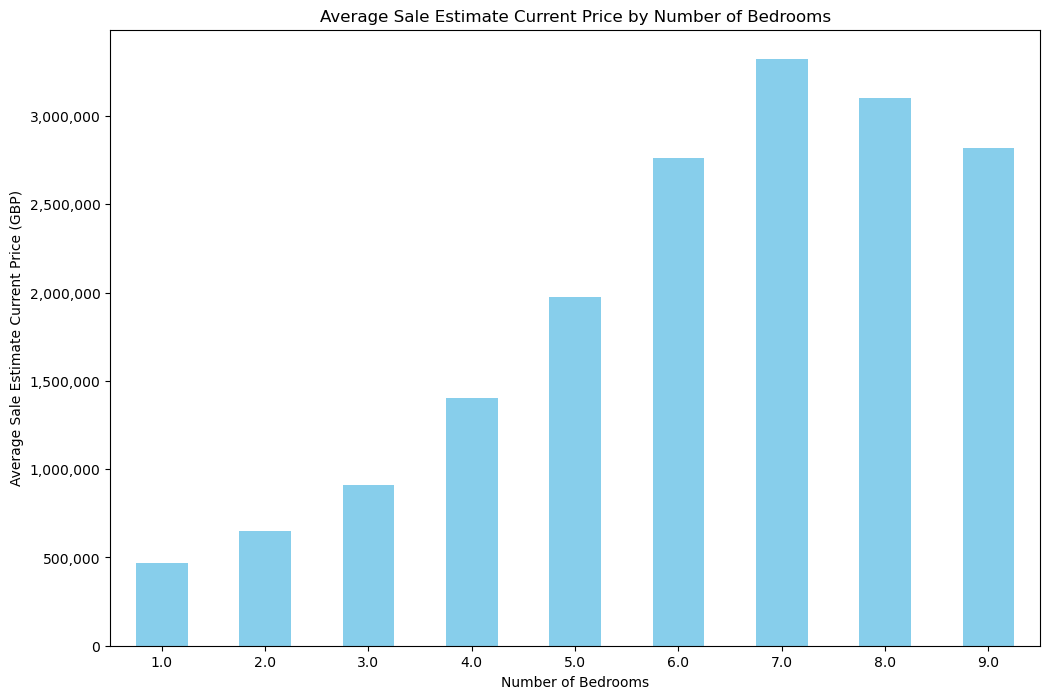

In [9]:
# Calculating mean saleEstimate_currentPrice for each number of bedrooms
bedroom_prices = clean_house_df.groupby('bedrooms')['saleEstimate_currentPrice'].mean()

# Plotting bar chart
plt.figure(figsize=(12, 8)) 
bedroom_prices.plot(kind='bar', color='skyblue')  
plt.title('Average Sale Estimate Current Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Sale Estimate Current Price (GBP)')
plt.xticks(rotation=0)

# Formatting the y-axis to show labels as currency 
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))  # Adds commas to the y-axis labels

# Save the figure
#plt.savefig('Price_by Number_of_Bedrooms.png', dpi=300, bbox_inches='tight')

plt.show()

- Key insight and takeaway:
  - Prices increase steadily with the number of bedrooms, peaking at 7.
  - The small drop after 7 bedrooms suggests only minor diminishing returns.

- Trend description:
  - Relationship is mostly linear and positive, with slight flattening at higher bedroom counts.

- Considerations for modeling:
  - Number of bedrooms is a strong linear predictor of price.
  - Linear model should perform well, with minimal adjustments needed at the high end.

### Floor Area against Sales Estimate Current Price

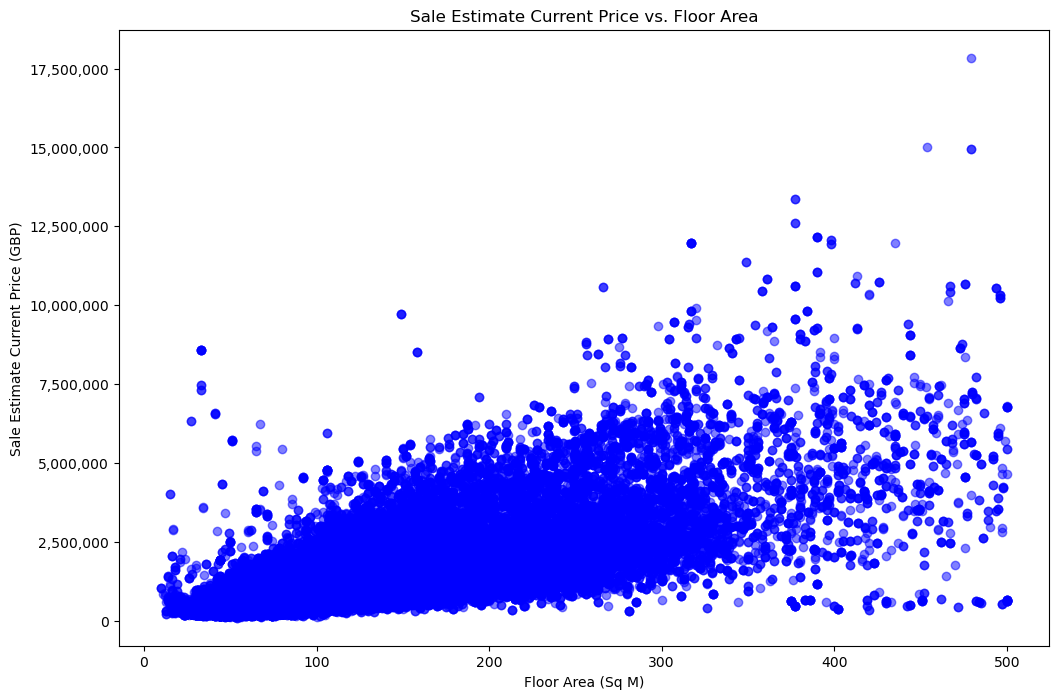

In [10]:
# Plotting the scatter plot 
plt.figure(figsize=(12, 8)) 
plt.scatter(clean_house_df['floorAreaSqM'], clean_house_df['saleEstimate_currentPrice'], alpha=0.5, color='blue')
plt.title('Sale Estimate Current Price vs. Floor Area')
plt.xlabel('Floor Area (Sq M)')
plt.ylabel('Sale Estimate Current Price (GBP)')

# Formatting y-axis
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))  

# Save the figure
#plt.savefig('Target_by_Floor_Area.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


- Key insight and takeaway:
  - Larger floor areas are generally associated with higher property prices.
  - Positive trend suggests that more space typically adds value.

- Trend description:
  - The relationship between floor area and price is mostly linear and positive.
  - Noticeable number of outliers are present, including some small properties with high prices and large properties with lower prices.

- Considerations for modeling:
  - Floor area is a strong predictor of price but may be influenced by other factors such as location or property type.
  - Linear model would perform well, but outliers could affect model stability and may require additional treatment.

### Longitude against Sales Estimate Current Price

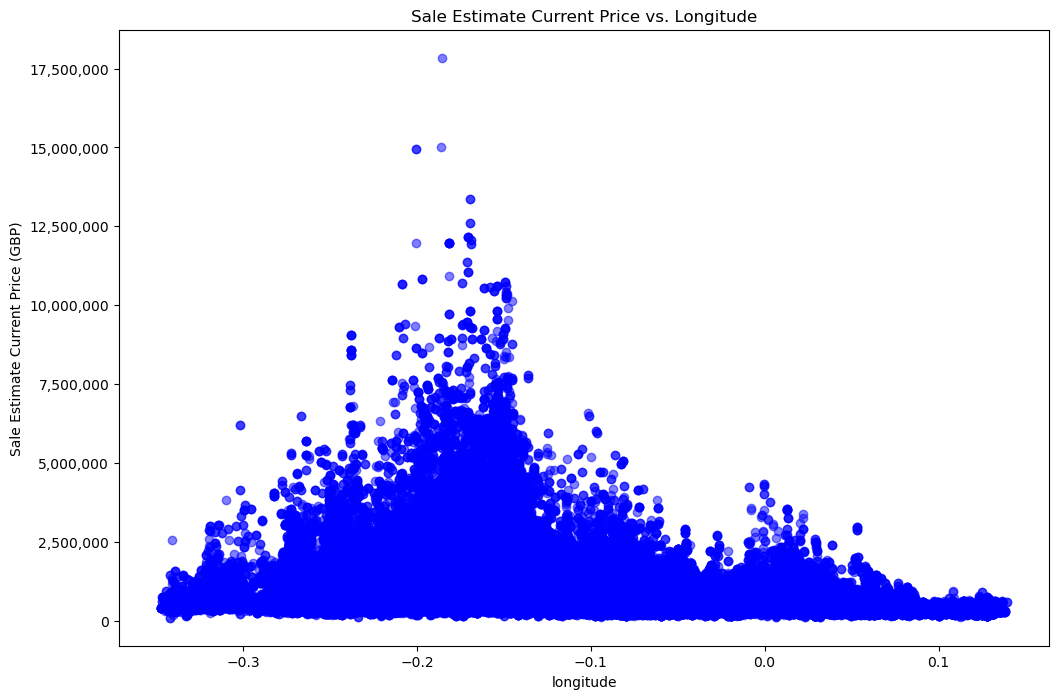

In [11]:
# Plotting the scatter plot 
plt.figure(figsize=(12, 8)) 
plt.scatter(clean_house_df['longitude'], clean_house_df['saleEstimate_currentPrice'], alpha=0.5, color='blue')
plt.title('Sale Estimate Current Price vs. Longitude')
plt.xlabel('longitude')
plt.ylabel('Sale Estimate Current Price (GBP)')

# Formatting y-axis
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))  

# Save the figure
#plt.savefig('Target_by_Floor_Area.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

- Key insight and takeaway:
  - Peak reflects the location of central, high-value areas in London. 
  - Longitude alone collapses spatial information, but the peak likely corresponds to Central London, where property values are highest.
  - Moving away from the center in either direction (East or West) typically leads to lower prices.
  

- Trend description:
  - Longitude does not have a clear linear relationship with property price.
  - Prices peak around a longitude of -0.25 and then gradually decline.
  - The relationship appears parabolic rather than linear, forming an arch-shape.
  

- Considerations for modeling:
  - Longitude alone may not be a strong linear predictor of price.
  - Linear model may not capture this pattern accurately.


### Latitude against Sales Estimate Current Price

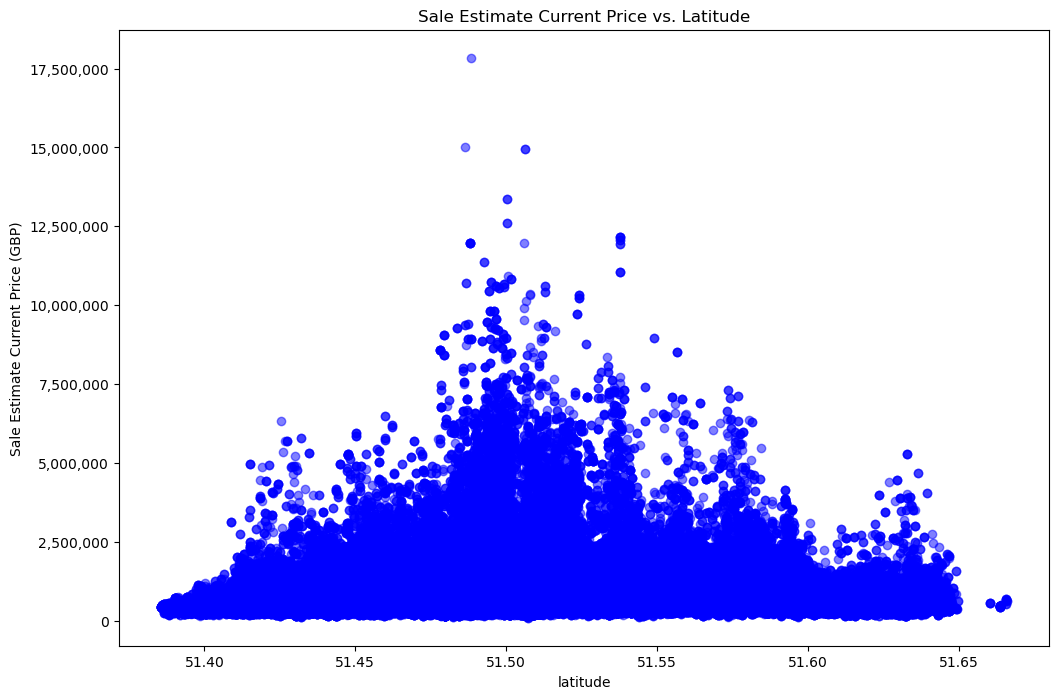

In [12]:
# Plotting the scatter plot 
plt.figure(figsize=(12, 8))
plt.scatter(clean_house_df['latitude'], clean_house_df['saleEstimate_currentPrice'], alpha=0.5, color='blue')
plt.title('Sale Estimate Current Price vs. Latitude')
plt.xlabel('latitude')
plt.ylabel('Sale Estimate Current Price (GBP)')

# Formatting y-axis
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))  

# Save the figure
#plt.savefig('Target_by_Floor_Area.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

- Key insight and takeaway:
  - Latitude shows a similar parabolic trend to longitude when plotted against property price.
  - Prices peak around a latitude of 51.52 and decline slightly moving north or south.
  - Properties closer to central areas are more expensive, while those further north or south are generally cheaper.

- Trend description:
  - The latitude range (51.35 to 51.70) is much narrower than longitude, reflecting London's relatively small north–south span.
  - The relationship is parabolic, with the highest property prices around 51.52, corresponding to Central London.

- Considerations for modeling:
  - Latitude alone does not fully capture spatial information.
  - Linear model may not accurately capture this pattern.


### Tenure against Average Sales Estimate Current Price

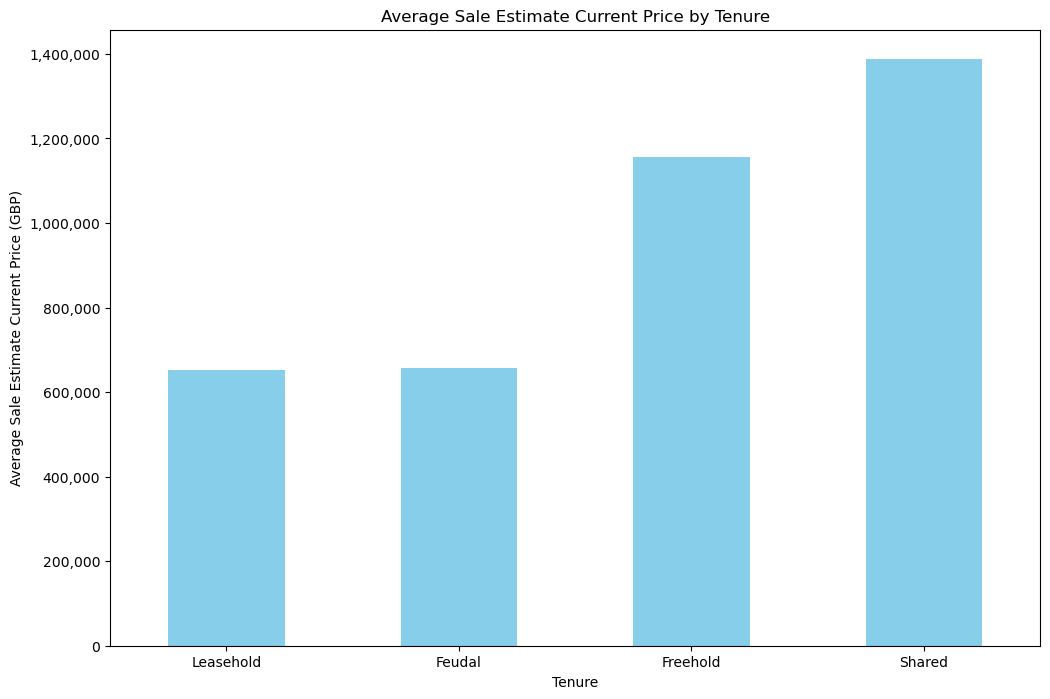

In [21]:
# Calculating mean saleEstimate_currentPrice for each number of bathrooms 
tenure_prices = clean_house_df.groupby('tenure')['saleEstimate_currentPrice'].mean()

# Sort the results by the sale estimate values in ascending order
tenure_prices = tenure_prices.sort_values()

# Plotting bar chart
plt.figure(figsize=(12, 8))
tenure_prices.plot(kind='bar', color='skyblue')
plt.title('Average Sale Estimate Current Price by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Average Sale Estimate Current Price (GBP)')
plt.xticks(rotation=0)

# Formatting the y-axis to show labels as currency 
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))  # Adds commas to the y-axis labels

# Show plot
plt.show()


- Tenure type definitions:
  - *Shared ownership* (also known as shared tenure housing): Individuals purchase a share of a property and pay rent on the remaining portion to a housing association.
  - *Freehold*: Full ownership of both the property and the land it stands on, with no time limit or ongoing rent obligations.
  - *Leasehold*: Ownership of the property for a fixed term, but not the land; typically involves ground rent and service charges.
  - *Feudal*: Older form of property ownership, mostly historical, similar to leasehold with certain traditional obligations tied to the land.

- Key insights:
  - Shared ownership properties show the highest average valuations compared to other tenure types.
  - Freehold properties generally have higher prices than leasehold or feudal properties due to offering full, unrestricted ownership.

- Trend explanation:
  - Shared ownership properties often come from newer, high-value developments, which inflates their average price figures.
  - Freehold ownership commands a premium due to the security and permanence of owning both property and land.
  - Leasehold and feudal properties tend to have lower average prices because of ownership limitations and additional costs.

- Considerations for modeling:
  - Tenure type is a key categorical feature influencing property price.
  - Shared ownership properties may need to be treated separately, as their full valuation might not reflect the actual share owned by the buyer.
  - One Hot encoding required, as categories do not have any inherent order.

  Additional comments:

  Although it may seem anomalous that shared ownership properties have the highest average valuations, this is expected. Shared ownership schemes typically involve new, high-value developments where the full market price of the property is recorded, not the share purchased. As a result, shared ownership properties often reflect higher valuations despite offering only partial ownership to the buyer.





### Property type against Average Sales Estimate Current Price

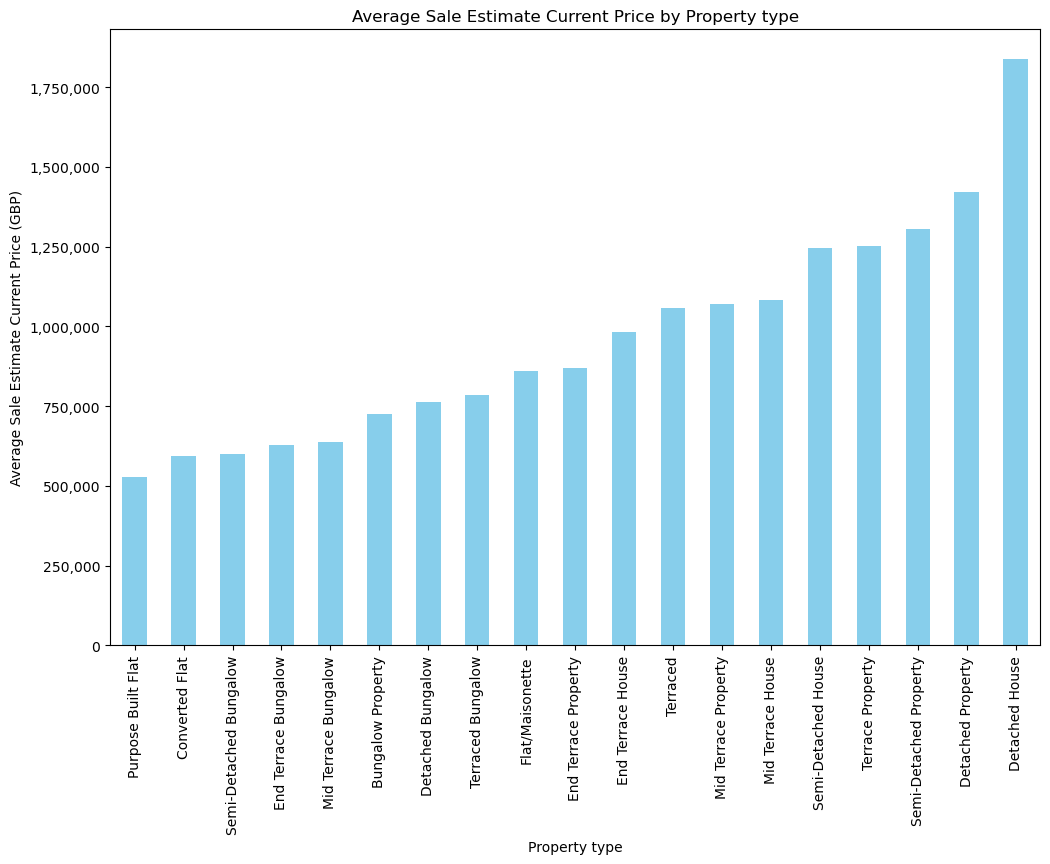

In [22]:
# Calculating mean saleEstimate_currentPrice for each number of bathrooms
property_prices = clean_house_df.groupby('propertyType')['saleEstimate_currentPrice'].mean()

# Sort the results by the sale estimate values in ascending order
property_prices = property_prices.sort_values()

# Plotting bar chart
plt.figure(figsize=(12, 8)) 
property_prices.plot(kind='bar', color='skyblue')  
plt.title('Average Sale Estimate Current Price by Property type')
plt.xlabel('Property type')
plt.ylabel('Average Sale Estimate Current Price (GBP)')
plt.xticks(rotation=90)

# Formatting the y-axis to show labels as currency 
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))  # Adds commas to the y-axis labels


# Show plot
plt.show()

- Key insights:
  - Despite some minor anomalies, the overall trend shows increasing property prices from flats to detached houses.
  - These small inconsistencies may be due to location, property age, or sample size differences between categories.

- Trend explanation:
  - Property type remains a strong indicator of price but with variations that suggest other factors which are also at play.
  - Flats generally have the lowest average prices, followed by bungalows, terraced houses, semi-detached houses, and detached houses with the highest prices.
  - Some inconsistencies exist, such as flat/maisonettes having slightly higher prices than bungalows, and terraced houses being slightly higher than semi-detached houses.

- Considerations for modelling:
  - One-hot encoding will be needed to represent property types numerically during preprocessing.
  - However, the large number of categories (high cardinality) could complicate linear model performance.
  - Binning similar property types into broader groups before encoding will reduce dimensionality and improve model stability.


### Current Energy Rating against Average Sales Estimate Current Price

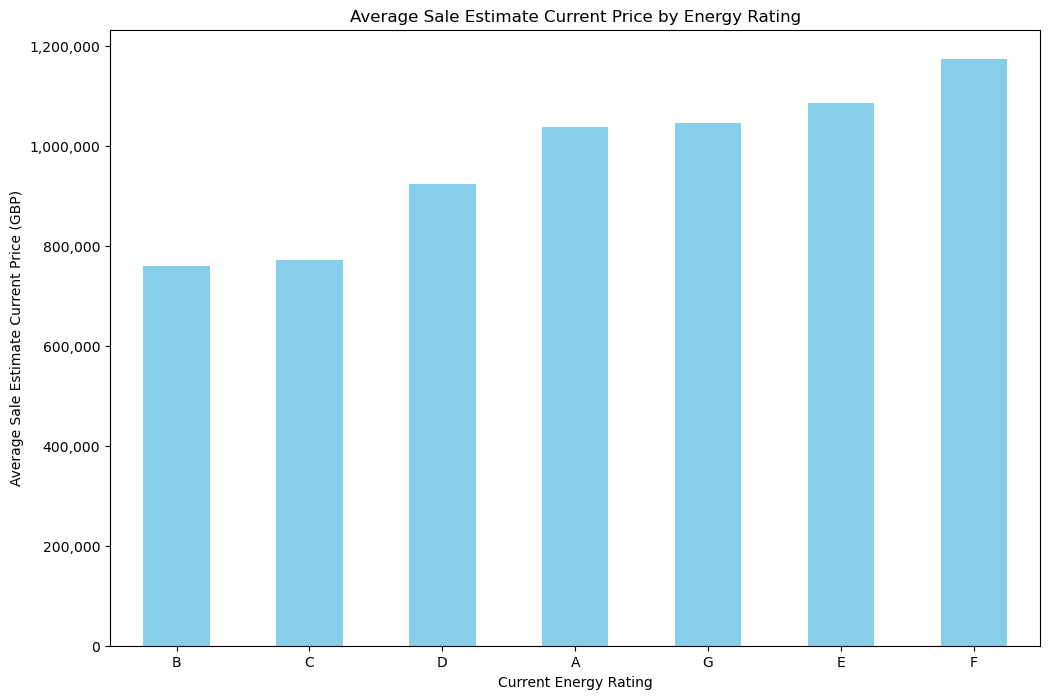

In [ ]:
# Calculating mean saleEstimate_currentPrice for each number of bathrooms
property_prices = clean_house_df.groupby('currentEnergyRating')['saleEstimate_currentPrice'].mean()

# Sort the results by the sale estimate values in ascending order
property_prices = property_prices.sort_values()

# Plotting bar chart
plt.figure(figsize=(12, 8)) 
property_prices.plot(kind='bar', color='skyblue')  
plt.title('Average Sale Estimate Current Price by Energy Rating')
plt.xlabel('Current Energy Rating')
plt.ylabel('Average Sale Estimate Current Price (GBP)')
plt.xticks(rotation=0)

# Formatting the y-axis to show labels as currency 
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))  # Adds commas to the y-axis labels

# Show plot
plt.show()


- Key insights:
  - The lack of a clear relationship between energy rating and property price suggests that energy efficiency may not be a major pricing factor in this dataset.
  - It is likely that other factors, such as property location, size, or type, outweigh the influence of energy rating on sale price.
  - High-value, older properties (e.g., historic townhouses) often have poor energy ratings but still command very high prices.
  
- Assumptions:
  - Better energy ratings (A or B) are expected to correlate with higher property values, as they imply lower utility costs and greater environmental friendliness.

- Trend description:
  - No consistent pattern is observed where better energy ratings correspond to higher prices.
  - Anomalies like F-rated properties having the highest prices suggest that energy rating is not a strong standalone predictor of price in this dataset.

- Considerations for modeling:
  - Ordinal encoding can be used, as the energy ratings have a natural order from A (best) to G (worst).
  - However, due to the weak observed relationship, energy rating may have limited predictive power unless combined with other features (e.g., property age or type).


### Reflections

The data shows many variables which have an impact on property prices, the majority of them appear to show mostly a linear relationship with the target. However, not all the features show a linear relationship with the target not satisifying the first assumption of linear regression. A non-linear model is likely what is going to achieve the best results for this problem space. 

The data also shows a mixture of categorical and numerical columns, for models to function properly, all the features must be converted into numerical form using different encoding methods where appropriate. This will be achieved in the pre-processing stage of the project.